<div class='alert alert-info'>
    <h1>Regresión logística para predicciones bancarias</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [24]:
data = pd.read_csv('../datasets/bank/bank.csv', sep=';')
data.head()                   

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [25]:
data['y'] = (data['y'] == 'yes').astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [5]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [26]:
# Unamos todas las educaciones basicas en una sola y cambio de nombre en las demas
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'high.school', 'High_School', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional_Course', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University_Degree', data['education'])
data['education'].unique()

array(['Basic', 'High_School', 'University_Degree', 'Professional_Course',
       'unknown', 'illiterate'], dtype=object)

In [5]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [8]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [6]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High_School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Professional_Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University_Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


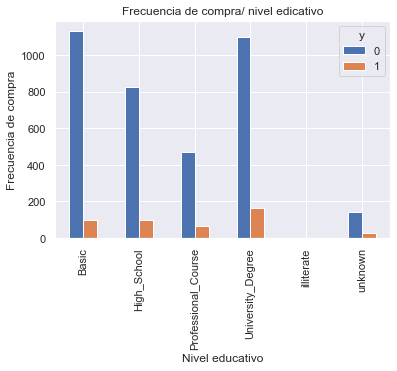

In [79]:
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.title('Frecuencia de compra/ nivel edicativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Frecuencia de compra')
plt.show()

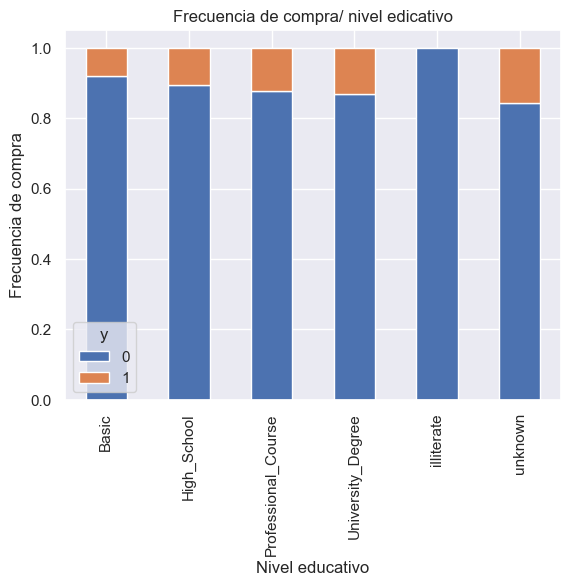

In [8]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Frecuencia de compra/ nivel edicativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Frecuencia de compra')
plt.show()

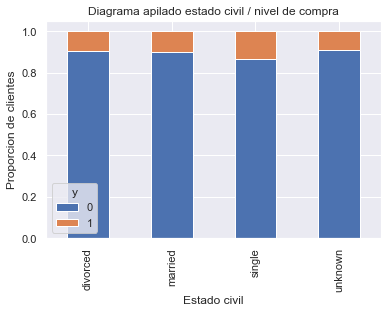

In [80]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Diagrama apilado estado civil / nivel de compra')
plt.xlabel('Estado civil')
plt.ylabel('Proporcion de clientes')
plt.show()

####   El estado civil no es un feature relevante en la compra o no compra.

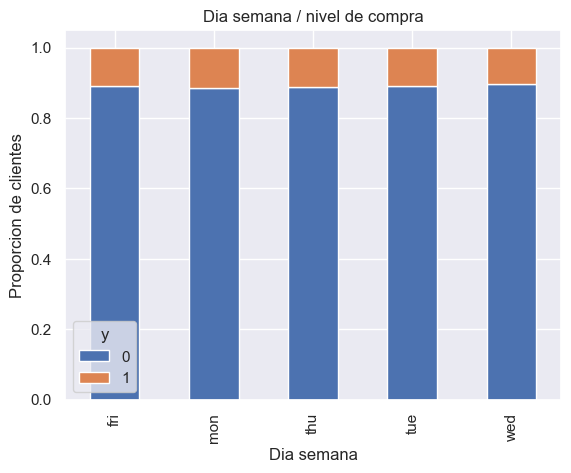

In [16]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Dia semana / nivel de compra')
plt.xlabel('Dia semana')
plt.ylabel('Proporcion de clientes')
plt.show()

#### El dia de la semana tampoco influye

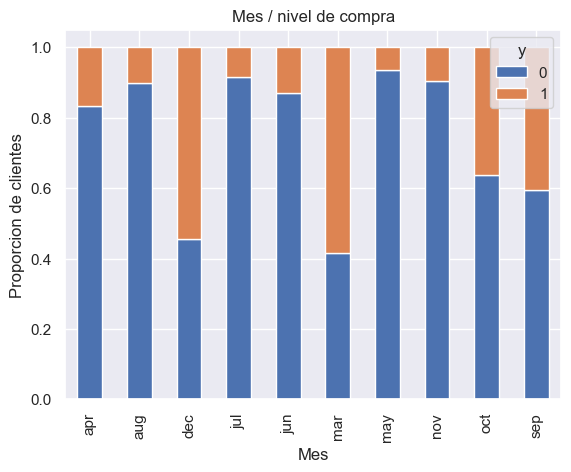

In [15]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title('Mes / nivel de compra')
plt.xlabel('Mes')
plt.ylabel('Proporcion de clientes')
plt.show()

Text(0, 0.5, 'Clientes')

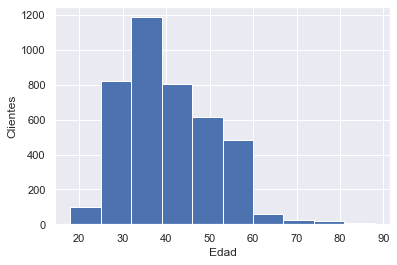

In [83]:
data.age.hist()
plt.xlabel('Edad')
plt.ylabel('Clientes')

Text(0.5, 0, 'putcome')

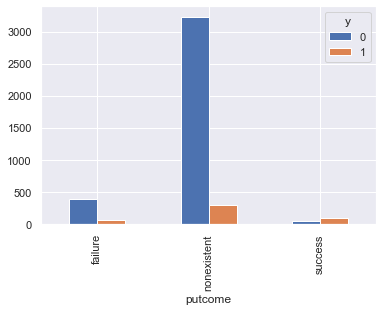

In [84]:
table = pd.crosstab(data.poutcome, data.y).plot(kind='bar')
plt.xlabel('putcome')


## Conversion de variables categoricas

In [27]:
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for category in categories:
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [28]:
data_vars = data.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categories]

In [29]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High_School',
       'education_Professional_Course', 'education_University_Degree',
       'education_illiterate', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

### Comencemos con el modelo

In [30]:
bank_tada_vars = bank_data.columns.values.tolist()
y = ['y']
x = [v for v in bank_tada_vars if v not in y]

In [31]:
# Seleccion de rasgos para el modelo.

n = 12

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression(solver='liblinear')

In [40]:
rfe = RFE(lr, n_features_to_select=n)
rfe = rfe.fit(bank_data[x], bank_data[y].values.ravel())

In [41]:
print(rfe.support_) # Variables que se quedan o se van del modelo

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]


In [42]:
print(rfe.ranking_) # A mayor numero, mas probable que se valla del modelo

[35 41 18 45  1 14 27 25  1 40 22  3  1 37  2 42  1  5 30 33 12 47 19 44
 31 49 26 13 21 32 48  8 36 34 50 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 46 38 28 43 29 11  1  7  1]


In [25]:
z = zip(bank_tada_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 35),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 37),
 ('job_housemaid', False, 2),
 ('job_management', False, 42),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 47),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 44),
 ('marital_married', False, 31),
 ('marital_single', False, 50),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High_School', False, 21),
 ('education_Professional_Course', False, 32),
 ('education_University_Degree', False, 48),
 ('education_illiterate', False, 8),
 ('education_u

In [47]:
cols = ['previous', 'euribor3m', 'job_blue-collar', 'job_retired', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_nov', 'day_of_week_wed', 'poutcome_nonexistent']

x = bank_data[cols]
y = bank_data['y']

## Modelo con statsmodels.api

In [48]:
import statsmodels.api as sm

In [49]:
logit_model = sm.Logit(y, x)

In [50]:
result = logit_model.fit();

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [51]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2023-02-17 20:29  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

Entre mas grande sea el P valor menor relevancia tiene el coeficiente en el modelo.

 ## ahora usemos sklearn

In [52]:
from sklearn import linear_model

In [53]:
logit_model = linear_model.LogisticRegression(solver='liblinear')
logit_model.fit(x, y)

LogisticRegression(solver='liblinear')

In [54]:
logit_model.score(x, y)

0.8963340616654528

In [55]:
# Cuanta gente compra y no compra
y.mean()

0.10949259529011895

Un 10 % de la gente compra, analizando sin modelo.

Sin modelo tenemos una precision de:

In [56]:
1-y.mean()

0.8905074047098811

La cual es algo menor de la obtenida con el modelo.

In [57]:
pd.DataFrame(list(zip(x.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571354212701]
1,euribor3m,[-0.5464961330788956]
2,job_blue-collar,[-0.35915536221273436]
3,job_retired,[0.35603838877924276]
4,month_aug,[0.6253983086336311]
5,month_dec,[1.1822172985998933]
6,month_jul,[0.9622633627476248]
7,month_jun,[1.054317924860916]
8,month_mar,[1.63063662978295]
9,month_nov,[0.45195768181515833]


el valor de cada coeficiente indica los cambios en escala logaritmica (logaritmo del cociente de probabilidades Log(P / 1-p), por cada unidad de cambio de la variable.

## Validando el modelo.

In [58]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [63]:
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [64]:
probs = lm.predict_proba(x_test)

In [65]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044408, 0.34955592],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

La primer columna es la probabilidad de que tan seguros estamos de nuestra prediccion, y la segunda es la probabilidad de salida, en este caso de si/no compra.

In [66]:
prediction = lm.predict(x_test)

In [67]:
# Menores a 0.5 ==> no compra, osea cero.
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# Como solo el 10% de las personas compran, usar 0.5 como factor discrimante puede no ser muy bueno
# , por lo que podemos cambiar ese valor
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [45]:
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,846
1,390


In [46]:
390/(390+846)  # probabilidad de si compra

0.3155339805825243

In [47]:
1-0.315533980  # probabilidad de no compra

0.68446602

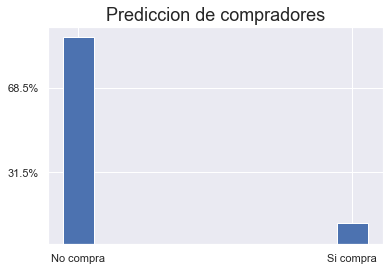

In [85]:
plt.hist(prob_df['prediction'])
plt.xticks([0.05, 0.95], ['No compra', 'Si compra'])
plt.yticks([390, 846], ['31.5%', '68.5%'])
plt.title('Prediccion de compradores', size=18)
plt.show()

In [68]:
from sklearn import metrics

In [69]:
metrics.accuracy_score(y_test, prediction)

0.9004854368932039

Tenemos una coincidencia del 90% entre nuestras predicciones y los datos de test.

# Validación cruzada

In [53]:
from sklearn.model_selection import cross_val_score

In [55]:
k_folds = 10
scores = cross_val_score(linear_model.LogisticRegression(solver='liblinear'), x, y, scoring='accuracy', cv=k_folds)

In [56]:
scores.mean()

0.8943884240990478

 # Matrices de confusión
 
 * Numero de positivos reales TP + FN  (TruePositive + FalseNegative)
 * Numero de negativos reales TN + FP
 * Numero de predicciones correctas TP + TN
 * Numero de predicciones incorrectas FP + FN
 
 
 * Sencibilidad TPR = TP/(TP + FN)
 * Especifidad TNR = TN/(TN + FP)

### Curvas ROC (Caracteristica operativa del receptor)

* Especifivad VS sencibilidad.
* Incrementar la sencibilidad hara bajar la especifidad.
* Cuanto mejor se ajuste la curva al borde superior izquierdo, mejor es la prediccion.
* Cuanto mas cerca de la diagonal, peor es el modelo.
* Cuando mayor sea el area bajo la curva, mejor es el modelo.


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
probs = lm.predict_proba(x_test)

In [69]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)

In [95]:
threshold = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
senb = [1]
espec = [1]

for t in threshold:
    
    prob_df['prediction'] = np.where(prob_df[0] > t, 1, 0)
    prob_df['actual'] = list(y_test)

    confution_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

    TN = confution_matrix[0][0]
    TP = confution_matrix[1][1]
    FN = confution_matrix[1][0]
    FP = confution_matrix[0][1]

    sencibilidad = TP/(TP+FN)
    especifidad = TN/(TN + FP)
    especifidad_1 = 1 - especifidad
    
    senb.append(sencibilidad)
    espec.append(especifidad_1)

senb.append(0)
espec.append(0)

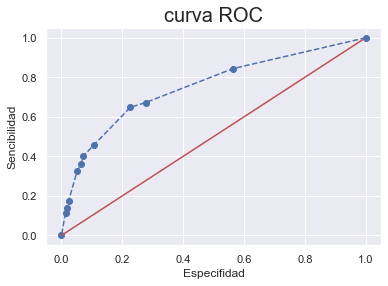

In [96]:
sns.set(style="darkgrid")
plt.plot(espec, senb, marker='o', linestyle='--', color='b')

xd = [i*0.01 for i in range(100)]
yd = [i*0.01 for i in range(100)]
plt.plot(xd, yd, color='r')

plt.title('curva ROC', size=20)
plt.xlabel('Especifidad')
plt.ylabel('Sencibilidad')
plt.show()

Lo que esta dobre la diagonal es como elegir al azar, lo que esta debajo de la curva es peor que solo elegir al azar y lo que esta sobre la curva es mejor.

In [97]:
from sklearn import metrics

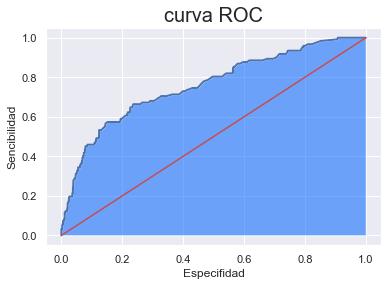

In [129]:
espc_1, sensit, _ = metrics.roc_curve(y_test, prob)

fig, ax = plt.subplots()

ax.plot(espc_1, sensit, color='b', linewidth=2)

xd = [i*0.01 for i in range(101)]
yd = [i*0.01 for i in range(101)]
plt.plot(xd, yd, color='r')
ax.fill_between(espc_1, sensit, 0, facecolor='#0064ff8a')

plt.title('curva ROC', size=20)
plt.xlabel('Especifidad')
plt.ylabel('Sencibilidad')
plt.show()

In [106]:
auc = metrics.auc(espc_1, sensit)  #  area under curve
auc

0.7575712982311564

In [9]:
table

y,0,1
education,,
Basic,1133,98
High_School,824,97
Professional_Course,470,65
University_Degree,1099,165
illiterate,1,0
unknown,141,26


In [13]:
table.sum(1)

education
Basic                  1231
High_School             921
Professional_Course     535
University_Degree      1264
illiterate                1
unknown                 167
dtype: int64

In [59]:
logit_model.coef_

array([[ 0.50765714, -0.54649613, -0.35915536,  0.35603839,  0.62539831,
         1.1822173 ,  0.96226336,  1.05431792,  1.63063663,  0.45195768,
         0.04171434,  0.30569877]])

In [60]:
np.transpose(logit_model.coef_)

array([[ 0.50765714],
       [-0.54649613],
       [-0.35915536],
       [ 0.35603839],
       [ 0.62539831],
       [ 1.1822173 ],
       [ 0.96226336],
       [ 1.05431792],
       [ 1.63063663],
       [ 0.45195768],
       [ 0.04171434],
       [ 0.30569877]])

In [61]:
logit_model.coef_.ravel()

array([ 0.50765714, -0.54649613, -0.35915536,  0.35603839,  0.62539831,
        1.1822173 ,  0.96226336,  1.05431792,  1.63063663,  0.45195768,
        0.04171434,  0.30569877])